In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.plotly as py
import plotly.graph_objs as go 
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf
init_notebook_mode(connected=True)
cf.go_offline()
%matplotlib inline

In [3]:
data = pd.read_csv("../input/results.csv")

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39672 entries, 0 to 39671
Data columns (total 9 columns):
date          39672 non-null object
home_team     39672 non-null object
away_team     39672 non-null object
home_score    39672 non-null int64
away_score    39672 non-null int64
tournament    39672 non-null object
city          39672 non-null object
country       39672 non-null object
neutral       39672 non-null bool
dtypes: bool(1), int64(2), object(6)
memory usage: 2.5+ MB


In [5]:
data.describe()

,home_score,away_score
count,39672.000000,39672.000000
mean,1.747832,1.187865
std,1.746936,1.399673
min,0.000000,0.000000
25%,1.000000,0.000000
50%,1.000000,1.000000
75%,2.000000,2.000000
max,31.000000,21.000000


In [6]:
def result(row):
      
    if row['home_score'] > row['away_score']:
        return row['home_team']
    elif row['home_score'] < row['away_score']:
        return row['away_team']
    else:
        return('Tie')
    

In [7]:
data['results'] = data[['home_score','away_score','home_team','away_team']].apply(result,axis=1)
data.head(2)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,results
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,Tie
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,England


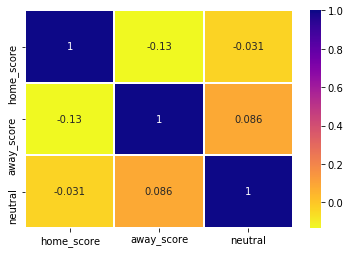

In [8]:
data_corr = data.corr()
sns.heatmap(data_corr,cmap='plasma_r', lw = 1, annot = True)

In [9]:
type(data['date'].iloc[0])

str

In [10]:
data['date'] = pd.to_datetime(data['date'])
time = data['date'].iloc[0]
time.year

1872

In [11]:
data['month'] = data['date'].apply(lambda time: time.month)
data['year']  = data['date'].apply(lambda time: time.year)

In [12]:
data['month'] = data['month'].map({1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sep', 
                                 10:'Oct', 11:'Nov', 12:'Dec'})

In [13]:
data.head(2)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,results,month,year
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,Tie,Nov,1872
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,England,Mar,1873


In [14]:
match_count = data['year'].value_counts()
match_count.head(2)

2008    1087
2011    1077
Name: year, dtype: int64

Text(0.5, 0, 'Year')

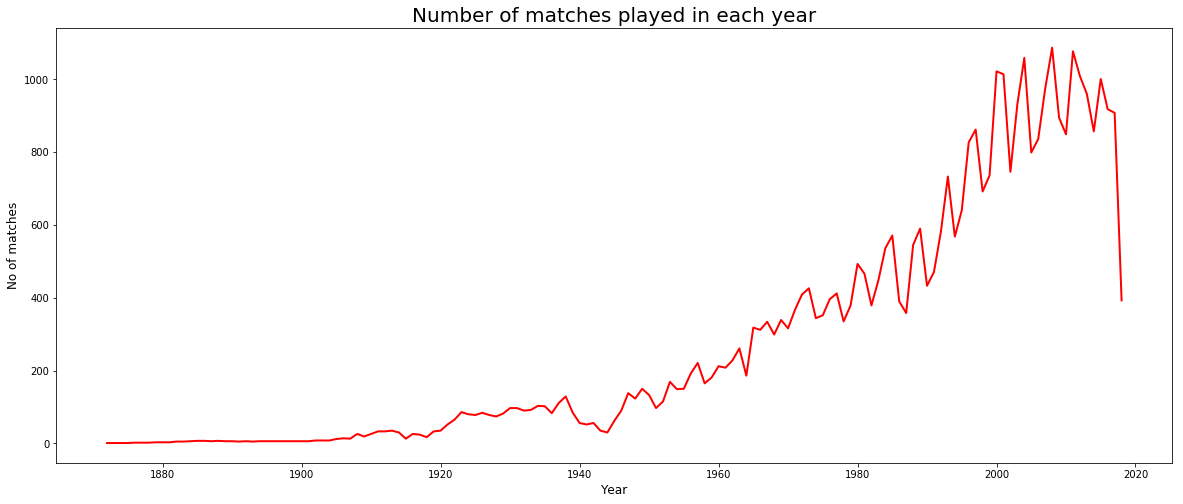

In [15]:
plt.figure(figsize=(20,8))
sns.lineplot(match_count.index, match_count.values, color='red', lw=2)
plt.title('Number of matches played in each year', fontsize=20)
plt.ylabel('No of matches', fontsize=12)
plt.xlabel('Year', fontsize=12)

Text(0.5, 0, 'Country')

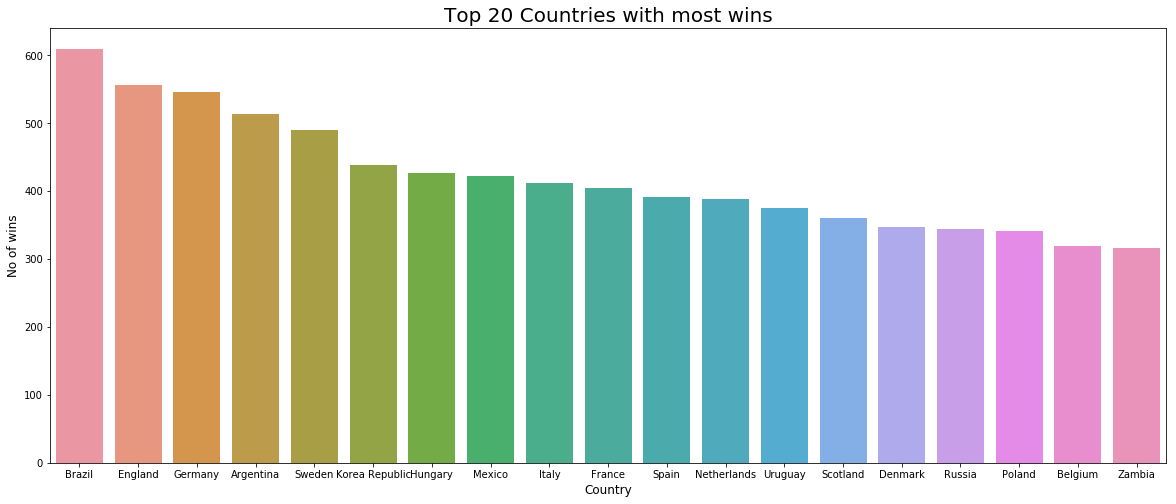

In [16]:
plt.figure(figsize=(20,8))
sns.countplot(x='results',data=data, order =data['results'].value_counts()[1:20].index)
plt.title('Top 20 Countries with most wins', fontsize=20)
plt.ylabel('No of wins', fontsize=12)
plt.xlabel('Country', fontsize=12)

In [17]:
brazil = data[data['results']=='Brazil']['city'].value_counts()[:20]

Text(0.5, 0, 'No of times won')

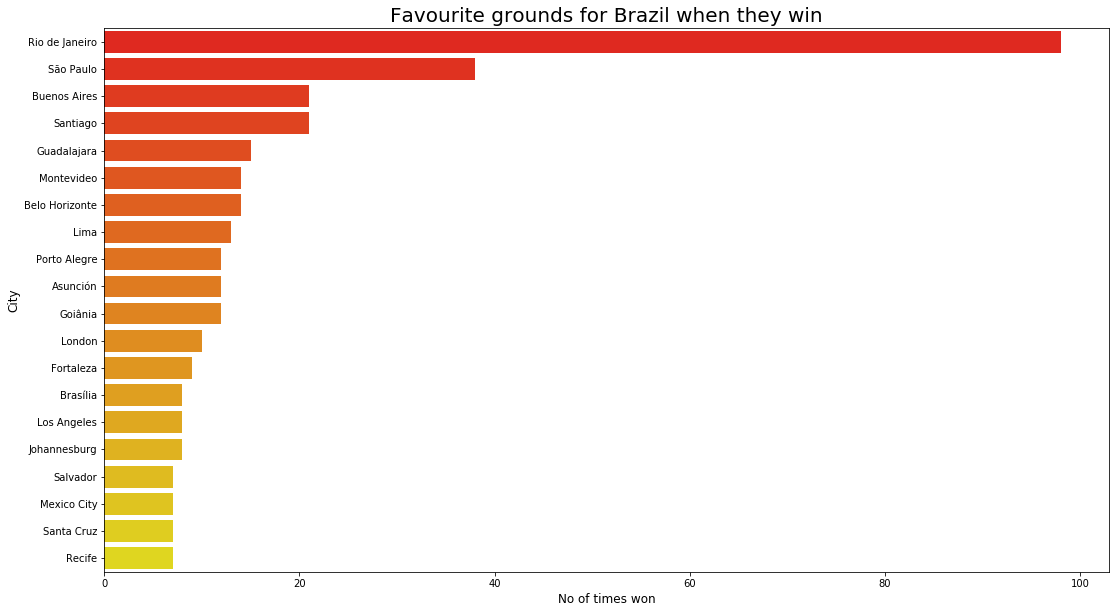

In [36]:
plt.figure(figsize=(18,10))
sns.barplot(brazil.values,brazil.index,palette='autumn')
plt.title("Favourite grounds for Brazil when they win", fontsize=20)
plt.ylabel('City', fontsize=12)
plt.xlabel('No of times won', fontsize=12)

In [19]:
def home_wins(row):
        
        if row['home_team'] == row['results']:
            return("Home")
        elif row['home_team'] != row['results'] and row['results'] == 'Tie':
            return("Tie")
        else:
            return("Away")
       

In [20]:
data['home_win'] = pd.DataFrame(data[['home_team','results']].apply(home_wins,axis=1))
data.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,results,month,year,home_win
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,Tie,Nov,1872,Tie
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,England,Mar,1873,Home
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,Scotland,Mar,1874,Home
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,Tie,Mar,1875,Tie
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,Scotland,Mar,1876,Home


Text(0.5, 0, 'Home or Away')

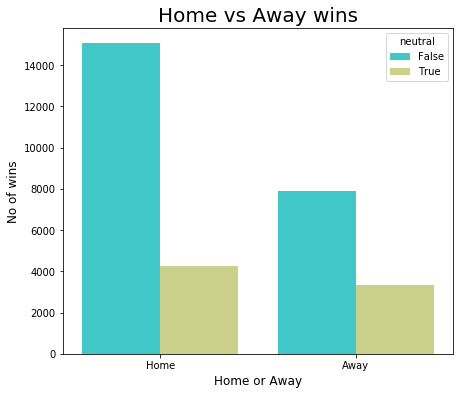

In [21]:
plt.figure(figsize=(7,6))
sns.countplot(x='home_win', palette='rainbow',hue='neutral',data=data[data.home_win != 'Tie'])
plt.title('Home vs Away wins', fontsize=20)
plt.ylabel('No of wins', fontsize=12)
plt.xlabel('Home or Away', fontsize=12)


In [22]:
tour = data['tournament'].value_counts()
tour.head()

Friendly                                16475
FIFA World Cup qualification             7100
UEFA Euro qualification                  2332
African Cup of Nations qualification     1558
FIFA World Cup                            900
Name: tournament, dtype: int64

In [27]:
data1 = dict(
      values = tour.values[:20],
      labels = tour.index[:20],
      domain = {"x": [0, .5]},
      hoverinfo = "label+percent+name",
      type =  "pie")
layout1 = dict(
        title =  "Top 20 most played Leagues",
            )
fig = go.Figure([data1],layout1)
iplot(fig)

In [24]:
total_scores = data[['home_score','away_score','country','month','year']]
total_scores['total_score'] = total_scores['home_score'] + total_scores['away_score']
total_scores.head()

,home_score,away_score,country,month,year,total_score
0,0,0,Scotland,Nov,1872,0
1,4,2,England,Mar,1873,6
2,2,1,Scotland,Mar,1874,3
3,2,2,England,Mar,1875,4
4,3,0,Scotland,Mar,1876,3


Text(0.5, 69.0, 'Months')

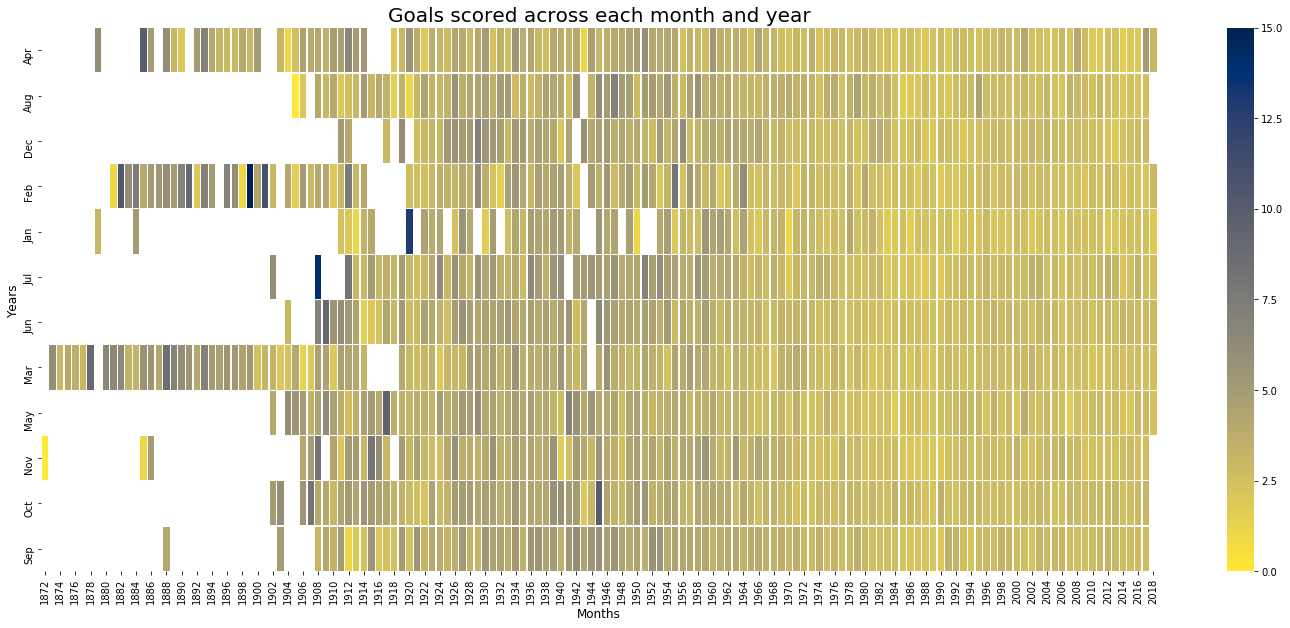

In [25]:
plt.figure(figsize=(25,10))
dj = total_scores.pivot_table(index='month',columns='year',values='total_score')
sns.heatmap(dj,cmap='cividis_r',linecolor='white', lw = 0.2)
plt.title('Goals scored across each month and year', fontsize=20)
plt.ylabel('Years', fontsize=12)
plt.xlabel('Months', fontsize=12)


In [26]:
goals_scored = total_scores.groupby('country').sum()

In [28]:
data2 = dict(type = 'choropleth',
            colorscale = 'Portland',
            locations = goals_scored.index,
            locationmode = 'country names',
            z = goals_scored['total_score'],
            text = goals_scored.index,
            colorbar = {'title':'No of Goals'})

layout2 = dict(title = 'Number of goals scored in various Venues',
               geo = dict(showframe = False, projection = {'type':'natural earth'}))

choromap2 = go.Figure([data2],layout2)

iplot(choromap2)

In [29]:
country_grouped = total_scores.groupby('country').sum().sort_values('total_score',ascending=False)[:30]

Text(0.5, 0, 'No of goals')

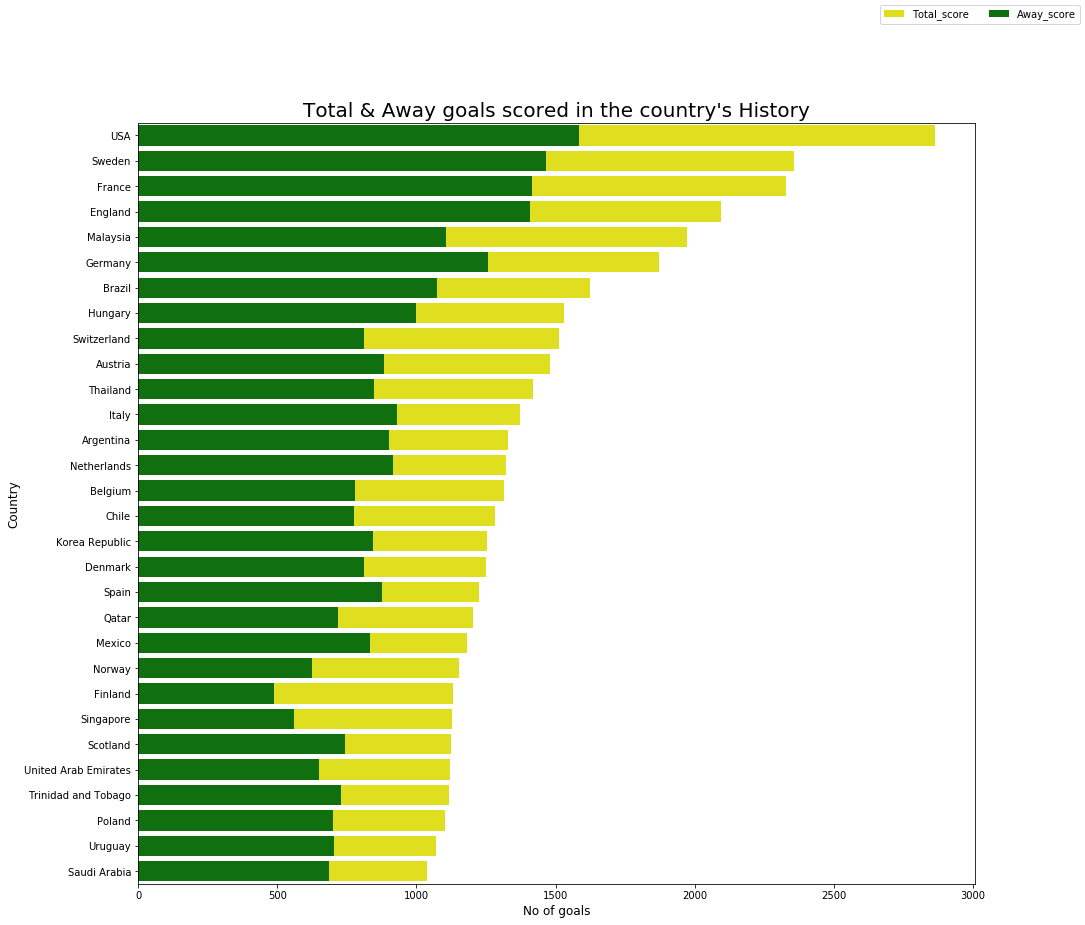

In [30]:
ax = plt.figure(figsize=(15,14))
sns.barplot(x="total_score", y=country_grouped.index, data=country_grouped, color ='yellow', label="Total_score")
sns.barplot(x="home_score", y=country_grouped.index, data=country_grouped, color = 'green', label="Away_score")
ax.legend(ncol=2, loc="upper right", frameon=True)
plt.title("Total & Away goals scored in the country's History", fontsize=20)
plt.ylabel('Country', fontsize=12)
plt.xlabel('No of goals', fontsize=12)


In [31]:
aaa= data['home_team'].value_counts()
bbb = data['away_team'].value_counts()
team_matches = pd.concat([aaa,bbb],axis=1)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning:

Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.




In [32]:
team_matches.columns = ['home_matches','away_matches']
team_matches['total_matches'] = team_matches['home_matches'] + team_matches['away_matches']
team_matches_sort = team_matches.sort_values('total_matches',ascending=False)

In [33]:
team_matches_sort.iplot(kind='scatter',title='Number of matches played', xTitle='Country', yTitle='No of matches',theme='pearl')


In [34]:
venues = pd.DataFrame(data['country'].value_counts())
venues.head()

,country
USA,1087
France,775
England,659
Malaysia,634
Sweden,632


In [35]:
data3 = dict(type = 'choropleth',
            colorscale = 'Reds',
            locations = venues.index,
            locationmode = 'country names',
            z = venues['country'],
            text = venues.index,
            colorbar = {'title':'No of matches hosted'})

layout3 = dict(title = 'Number of matches hosted by various Venues',
               geo = dict(showframe = False, projection = {'type':'natural earth'}))

choromap3 = go.Figure([data3],layout3)
iplot(choromap3)
